In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgOpenCV = cv2.imread('../image/test.jpg', cv2.IMREAD_GRAYSCALE)

In [2]:
def sobel_filter(image):
    # Tính gradient theo phương ngang (Gx) và phương dọc (Gy)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient ngang
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient dọc
    
    # Tính độ lớn gradient
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
    gradient_magnitude = np.uint8(gradient_magnitude)
    
    return gradient_magnitude

In [3]:
def prewitt_filter(image):
    # Định nghĩa kernel Prewitt
    kernelx = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])
    
    kernely = np.array([[-1, -1, -1],
                        [ 0,  0,  0],
                        [ 1,  1,  1]])
    
    # Tính gradient theo phương ngang và dọc
    prewittx = cv2.filter2D(image, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(image, cv2.CV_64F, kernely)
    
    # Tính độ lớn gradient
    gradient_magnitude = np.sqrt(prewittx**2 + prewitty**2)
    gradient_magnitude = np.uint8(gradient_magnitude)
    
    return gradient_magnitude

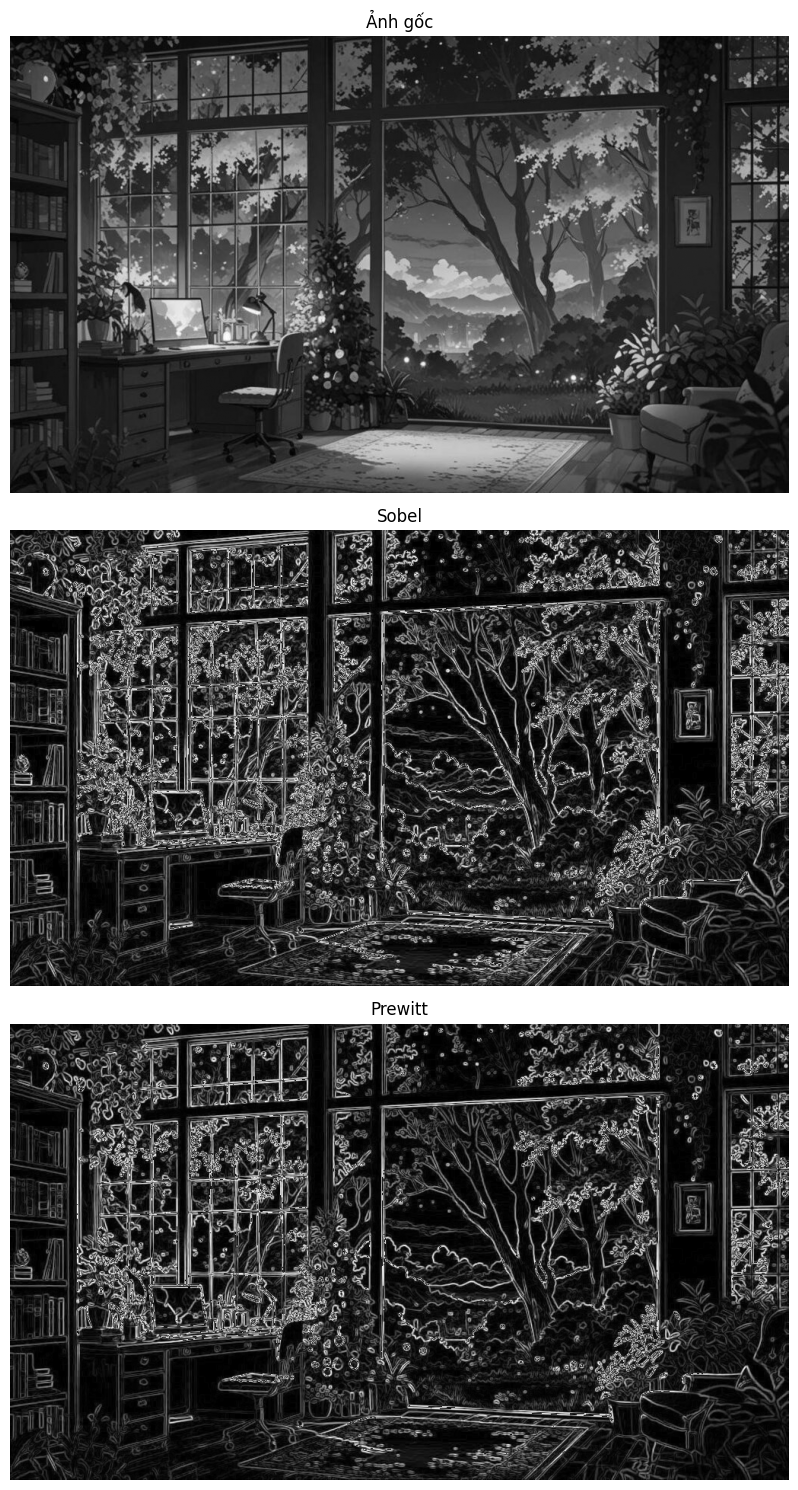

In [4]:
image_sobel = sobel_filter(imgOpenCV)
image_prewitt = prewitt_filter(imgOpenCV)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].imshow(imgOpenCV, cmap='gray')
axes[0].set_title('Ảnh gốc')
axes[0].axis('off')

axes[1].imshow(image_sobel, cmap='gray')
axes[1].set_title('Sobel')
axes[1].axis('off')

axes[2].imshow(image_prewitt, cmap='gray')
axes[2].set_title('Prewitt')
axes[2].axis('off')

plt.tight_layout()